# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Métricas

In [2]:
#Error medio absoluto

def mae(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = np.abs(df.iloc[i,1]-df.iloc[i,0])

        ac.append(v)

    mae = np.sum(ac)/len(ac)

    return mae

#Eficiencia Nash-Sutcliffe

def nse(df):

    ac1 = []
    ac2 = []


    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[i,1])**2
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        ac1.append(v1)
        ac2.append(v2)

    nse = 1 - (np.sum(ac1)/np.sum(ac2))

    return nse

#Raíz del error cuadrático medio:

def rmse(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = (df.iloc[i,1]-df.iloc[i,0])**2

        ac.append(v)

    rmse = np.sqrt(np.sum(ac)/len(ac))

    return rmse

#Coeficiente de correlación:

def r(df):

    ac1 = []
    ac2 = []
    ac3 = []

    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[:,0].mean())*(df.iloc[i,1]-df.iloc[:,1].mean())
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        v3 = (df.iloc[i,1]-df.iloc[:,1].mean())**2
        ac1.append(v1)
        ac2.append(v2)
        ac3.append(v3)

    r = np.sum(ac1) / np.sqrt((np.sum(ac2)*np.sum(ac3)))

    return r

"""
Nota: En el dataset la posición df.iloc[:,0] es el valor predicho
y la posición df.iloc[:,1] es el valor observado por lo que debe ir de la
siguiente manera df["Predicción","Observado"]
"""

'\nNota: En el dataset la posición df.iloc[:,0] es el valor predicho\ny la posición df.iloc[:,1] es el valor observado por lo que debe ir de la\nsiguiente manera df["Predicción","Observado"]\n'

# Base de datos completa

In [3]:
df = pd.read_excel("C:/Users/ferna/TESIS/fresnillo_completo.xlsx")

df.head()

,AÑO,MES,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,...,Pres_sat_max,Pres_sat_min,Pres_sat_med,Pres_real_de_vapor,Pres_media_de_vapor,Pend_curva,Deficit_de_presion,Dias_del_mes,Horas_luz,EVAP
0,2002,1,20.7,-0.1,10.2,10.0,82.1,22.0,51.2,554381.5,...,2.441544,0.606369,1.244517,0.637193,1.247053,0.083257,0.609860,31,10.9092,96.5
1,2002,2,23.1,1.8,12.7,15.0,77.1,17.7,43.6,616161.3,...,2.826475,0.695605,1.468630,0.640323,1.439519,0.096295,0.799196,28,11.3364,103.9
2,2002,3,25.4,3.4,15.1,9.0,68.7,13.3,35.8,797706.4,...,3.244042,0.779550,1.716356,0.614456,1.648302,0.110408,1.033847,31,12.0000,190.0
3,2002,4,28.2,6.4,18.3,2.5,62.1,11.0,30.2,852734.4,...,3.824172,0.961323,2.103245,0.635180,1.938367,0.131929,1.303187,30,12.7272,199.4
4,2002,5,29.4,11.3,21.0,13.4,80.1,16.0,44.3,887562.3,...,4.099208,1.339122,2.487005,1.101743,2.075885,0.152757,0.974142,31,13.2908,233.1


In [4]:
df["EVAP"].median()

142.0

# Gráfico del periodo de registro completo

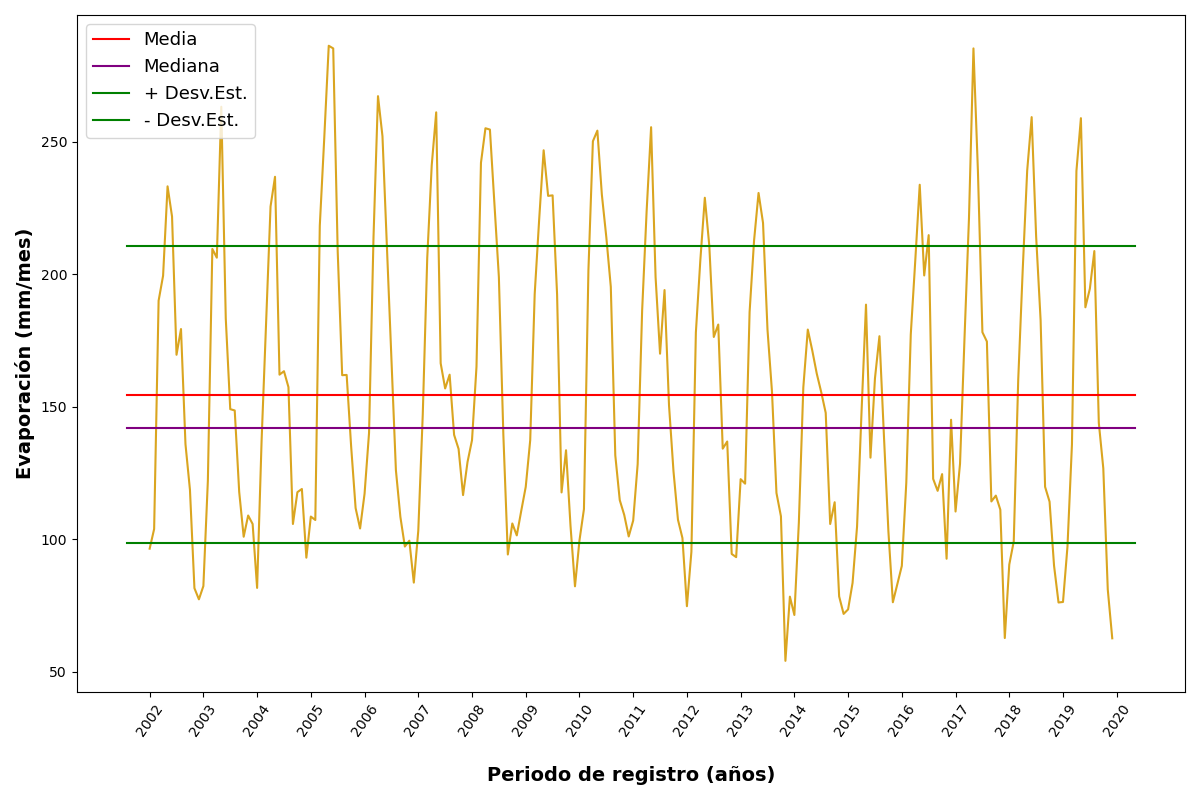

In [17]:
%matplotlib widget

x = np.linspace(-5,220,210)
x = x.reshape(len(x),1)

y_media = np.array([df["EVAP"].mean()])
y_media = np.tile(y_media,len(x))

y_median = np.array([df["EVAP"].median()])
y_median = np.tile(y_median,len(x))

y_de1 = np.array([df["EVAP"].mean()+df["EVAP"].std()])
y_de1 = np.tile(y_de1,len(x))

y_de2 = np.array([df["EVAP"].mean()-df["EVAP"].std()])
y_de2 = np.tile(y_de2,len(x))

fig = plt.figure(figsize=(12,8))

#plt.title("Evaporación estación: Calera")

plt.plot(df["EVAP"], color="goldenrod")
plt.plot(x,y_media, color="red", label = "Media")
plt.plot(x,y_median, color="purple", label = "Mediana")
plt.plot(x,y_de1, color="green", label = "+ Desv.Est.")
plt.plot(x,y_de2, color="green", label = "- Desv.Est.")
plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=14)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=14)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.legend(loc='best',fontsize=13)

#plt.grid()

#plt.savefig("estacion_fresnillo.png", bbox_inches="tight")

plt.show()

# Base de datos de parámetros climatológicos

In [9]:
df = df.drop(columns=["AÑO","MES"],axis=1)

df.head()

,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,V_V_MED_MAX,V_V_MEDIA,...,Pres_sat_max,Pres_sat_min,Pres_sat_med,Pres_real_de_vapor,Pres_media_de_vapor,Pend_curva,Deficit_de_presion,Dias_del_mes,Horas_luz,EVAP
0,20.7,-0.1,10.2,10.0,82.1,22.0,51.2,554381.5,19.9,7.9,...,2.441544,0.606369,1.244517,0.637193,1.247053,0.083257,0.609860,31,10.9092,96.5
1,23.1,1.8,12.7,15.0,77.1,17.7,43.6,616161.3,22.4,9.3,...,2.826475,0.695605,1.468630,0.640323,1.439519,0.096295,0.799196,28,11.3364,103.9
2,25.4,3.4,15.1,9.0,68.7,13.3,35.8,797706.4,23.6,10.0,...,3.244042,0.779550,1.716356,0.614456,1.648302,0.110408,1.033847,31,12.0000,190.0
3,28.2,6.4,18.3,2.5,62.1,11.0,30.2,852734.4,23.8,10.2,...,3.824172,0.961323,2.103245,0.635180,1.938367,0.131929,1.303187,30,12.7272,199.4
4,29.4,11.3,21.0,13.4,80.1,16.0,44.3,887562.3,24.1,7.3,...,4.099208,1.339122,2.487005,1.101743,2.075885,0.152757,0.974142,31,13.2908,233.1


# Nueva base de datos donde estarán los modelos realizados

In [10]:
modelos = pd.DataFrame(data=np.array(df.iloc[:,23]),columns=["Tanque"])

modelos

,Tanque
0,96.5
1,103.9
2,190.0
3,199.4
4,233.1
...,...
211,208.7
212,143.9
213,126.8
214,81.1


# Stephens Stewart

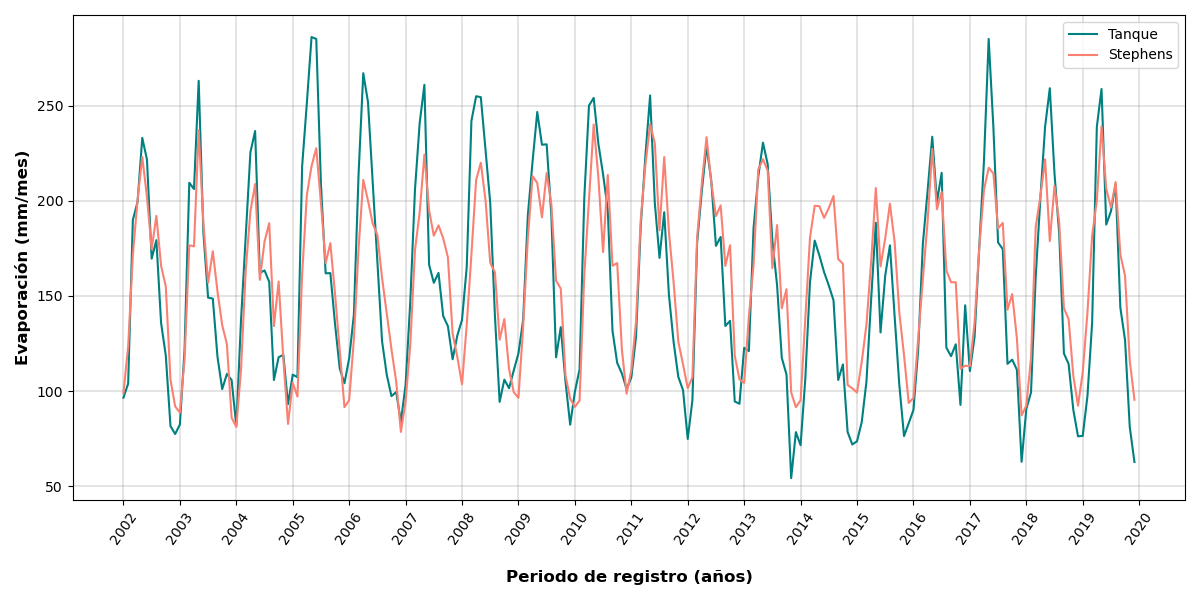

In [12]:
rad = ((df.iloc[:,7] / df.iloc[:,21] ) / df.iloc[:,22]) / 4

stephens = (0.0082* (df.iloc[:,2]*(9/5)+32) - 0.19)*(rad*0.03495) * df.iloc[:,21]

modelos["Stephens"] = stephens 

%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Stephens"],c="salmon",label="Stephens")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_steph.png", bbox_inches="tight")

plt.show()

In [13]:
print("R:")

print(r(modelos[["Stephens","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Stephens","Tanque"]]))

print("MAE:")

print(mae(modelos[["Stephens","Tanque"]]))

print("NSE:")

print(nse(modelos[["Stephens","Tanque"]]))

R:
0.8799069457786037
RMSE:
27.702554900034187
MAE:
23.034624874244088
NSE:
0.5809254179284669


# Makkink

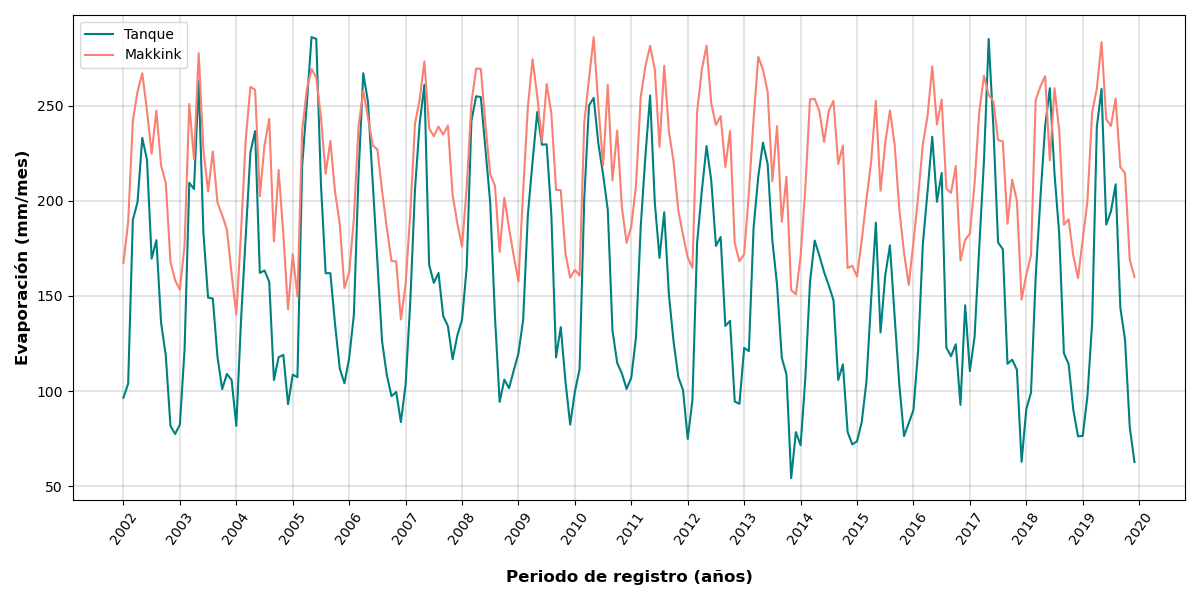

In [15]:
rad = ((df.iloc[:,7] / df.iloc[:,21] ) / df.iloc[:,22]) / 4

makkink = ((0.61*(df.iloc[:,19]*1000/(df.iloc[:,19]*1000+df.iloc[:,13]*1000)) * rad) - 0.12) \
            * (3.6/(df.iloc[:,12]*1000)) * 24 * df.iloc[:,21]


modelos["Makkink"] = makkink

%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Makkink"],c="salmon",label="Makkink")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_makk.png", bbox_inches="tight")

plt.show()

In [16]:
print("R:")

print(r(modelos[["Makkink","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Makkink","Tanque"]]))

print("MAE:")

print(mae(modelos[["Makkink","Tanque"]]))

print("NSE:")

print(nse(modelos[["Makkink","Tanque"]]))

R:
0.8803829588761589
RMSE:
67.96770978063209
MAE:
62.587110017243404
NSE:
-2.3235539890484587


# Linacre

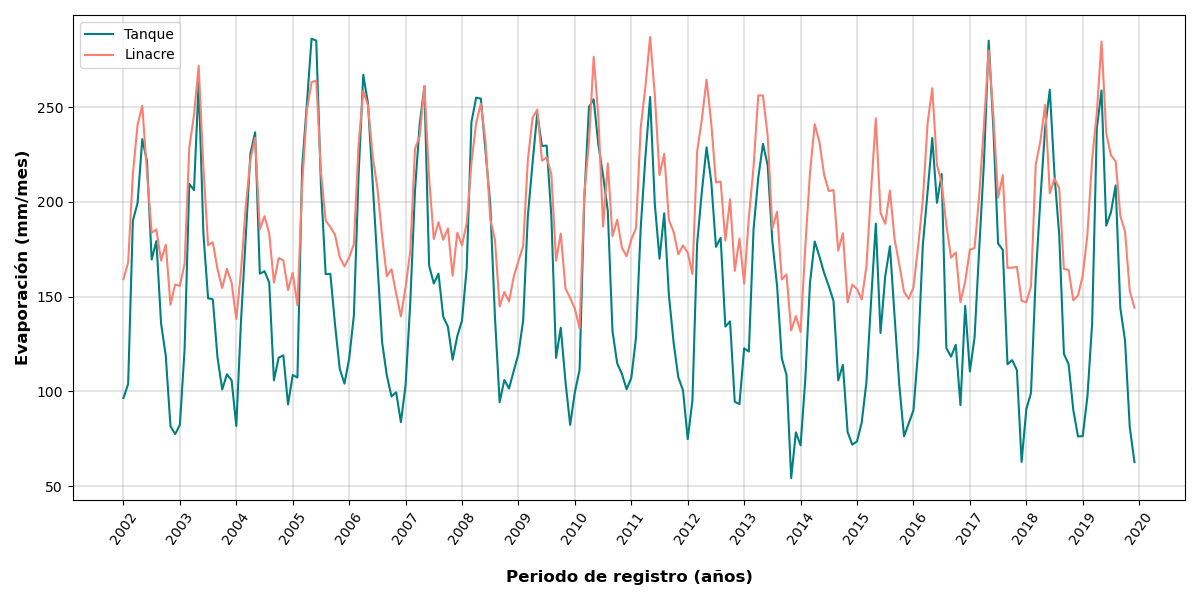

In [19]:
linacre = ((((700*(df.iloc[:,2]+0.006*2192))/(100-22.9))+15*(df.iloc[:,2]-(df.iloc[:,2]-((100-df.iloc[:,6])/5))))/(80-df.iloc[:,2]) * df.iloc[:,21])

modelos["Linacre"] = linacre

%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Linacre"],c="salmon",label="Linacre")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_linacre.png", bbox_inches="tight")

plt.show()

In [20]:
print("R:")

print(r(modelos[["Linacre","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Linacre","Tanque"]]))

print("MAE:")

print(mae(modelos[["Linacre","Tanque"]]))

print("NSE:")

print(nse(modelos[["Linacre","Tanque"]]))

R:
0.9235198560995775
RMSE:
47.60413849366309
MAE:
42.092707052676005
NSE:
-0.7098765202368187


# Romanenko

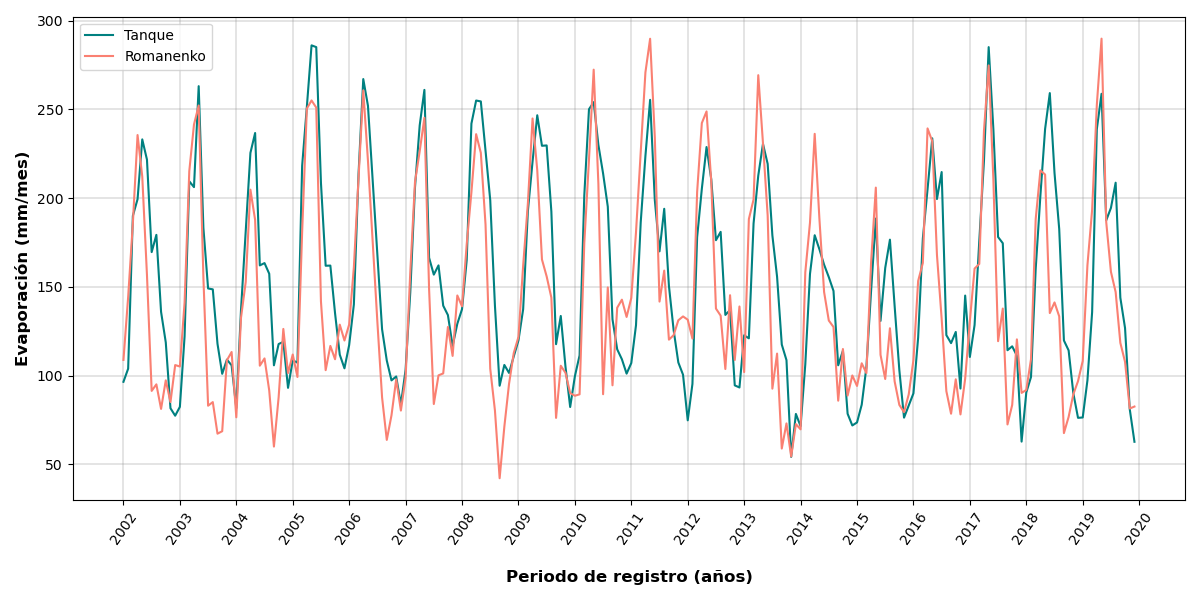

In [22]:
rom = 0.0018*((25+df.iloc[:,2])**2)*(100-df.iloc[:,6])

modelos["Romanenko"] = rom

%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(modelos["Tanque"],c="teal",label="Tanque")
plt.plot(modelos["Romanenko"],c="salmon",label="Romanenko")

plt.xlabel("\nPeriodo de registro (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,220,12), 
           [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_roman.png", bbox_inches="tight")

plt.show()

In [23]:
print("R:")

print(r(modelos[["Romanenko","Tanque"]]))

print("RMSE:")

print(rmse(modelos[["Romanenko","Tanque"]]))

print("MAE:")

print(mae(modelos[["Romanenko","Tanque"]]))

print("NSE:")

print(nse(modelos[["Romanenko","Tanque"]]))

R:
0.8051020758245013
RMSE:
37.23192118958672
MAE:
29.752372179629628
NSE:
0.5774963772726427


In [24]:
modelos.corr()

,Tanque,Stephens,Makkink,Linacre,Romanenko
Tanque,1.000000,0.879907,0.880383,0.923520,0.805102
Stephens,0.879907,1.000000,0.972196,0.903284,0.680392
Makkink,0.880383,0.972196,1.000000,0.909639,0.747408
Linacre,0.923520,0.903284,0.909639,1.000000,0.908538
Romanenko,0.805102,0.680392,0.747408,0.908538,1.000000


# Modelos de regresión lineal

## Stephens Stewart

In [25]:
x = modelos["Stephens"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.148x -28.433
0.7742362332294291


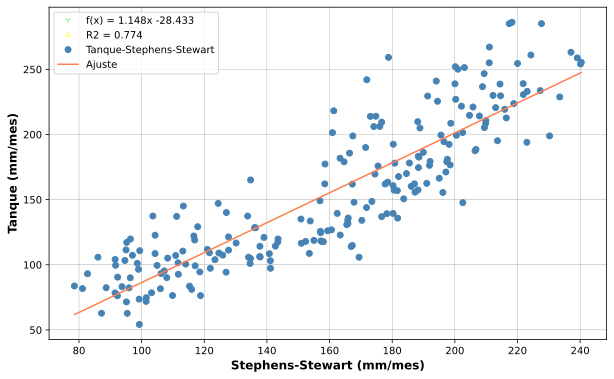

In [28]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Stephens-Stewart",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Stephens-Stewart (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_steph_corr.png", bbox_inches="tight")

plt.show()

## Makkink

In [29]:
x = modelos["Makkink"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.319x -130.285
0.7750741542795407


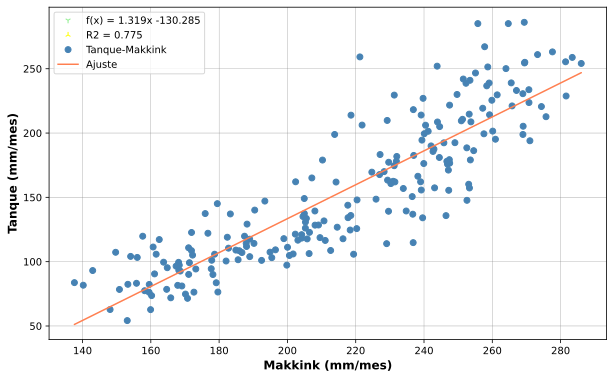

In [31]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Makkink",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Makkink (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_makk_corr.png", bbox_inches="tight")

plt.show()

## Linacre

In [32]:
x = modelos["Linacre"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 1.417x -120.64
0.8528889246101871


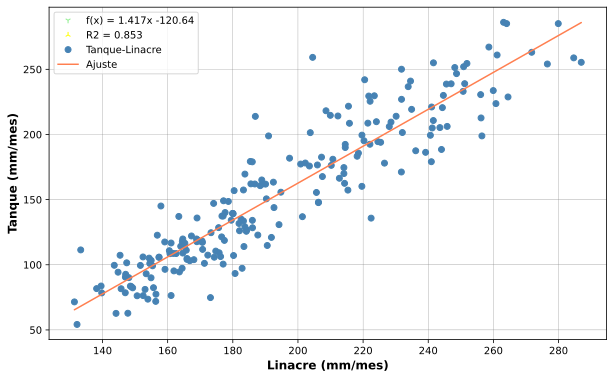

In [34]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Linacre",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Linacre (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_lina_corr.png", bbox_inches="tight")

plt.show()

## Romanenko

In [35]:
x = modelos["Romanenko"]
y = modelos["Tanque"]

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x + {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 0.785x + 42.437
0.6481893524969191


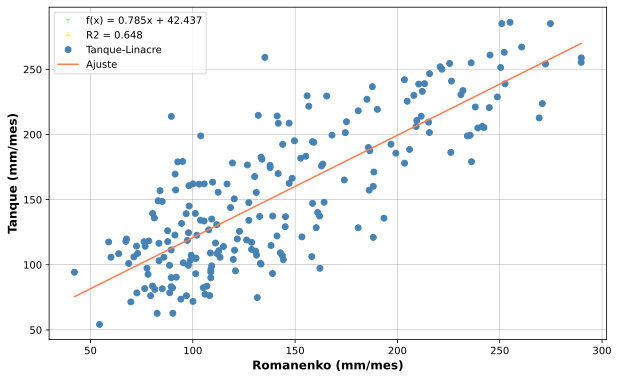

In [37]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x + {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-Linacre",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("Romanenko (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_roman_corr.png", bbox_inches="tight")

plt.show()